In [1]:
# Importacion de librerias
from torch import nn
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader


Definicion de clases

In [2]:
class Data(Dataset):
    def __init__(self, x, n, w):
        X_np = np.array([x**2, x, np.ones((n,))]).T
        X = torch.from_numpy(X_np).float()
        y = -(x-2)**2 + 3 +0.2*np.sin(16*x)
        Y = torch.from_numpy(y).float()
        self.x = X
        self.y = Y
        self.len = self.x.shape[0]
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    def __len__(self):
        return self.len


class linear_regression(nn.Module):
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        yhat = self.linear(x)
        return yhat.squeeze(-1)


Funcion de entrenamiento

In [9]:
def train(model, optimizer, criterion, trainloader, epochs):
    LOSS=[]
    for epoch in range(epochs):
        total = 0
        for x, y in trainloader:
            if torch.cuda.is_available():
                x, y = x.cuda(), y.cuda()
            optimizer.zero_grad()
            yhat = model.forward(x)
            loss = criterion(yhat, y)
            loss.backward()
            optimizer.step()
            total += loss.item()
        LOSS.append(total)
        print("Epoch:", epoch, "MSE:", total) 
    return LOSS 

In [3]:
# Definición del dataset
n = 10000
x = np.linspace(0, 4, n)
w = torch.tensor([0.52864676, 0.04550111, 0.77341328]) #Mismas componentes iniciales que en problema 2
dataset = Data(x, n, w)

In [14]:
# Definición de hiperparáemtros del modelo
len_batch = round(n/5)
learning_rate = 0.005 
n_epochs = 1000

En el modelo que programé para la clase 2 el learnin rate era 0.000005 (4 ordenes de magnitud menos), y el error al final del entrenamiento llegaba a menos de 1e-3

In [15]:
# Definicion del modelo de regresion, optimizador y criterio de perdida
input_size = 3
output_size = 1
model = linear_regression(input_size, output_size)
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()
trainloader = DataLoader(dataset=dataset, batch_size=len_batch)

In [16]:
# Entrenamiento del modelo
cost_loss = train(model, optimizer, criterion, trainloader, epochs=n_epochs)

Epoch: 0 MSE: 16.59522944688797
Epoch: 1 MSE: 20.590452879667282
Epoch: 2 MSE: 15.142284870147705
Epoch: 3 MSE: 14.610872358083725
Epoch: 4 MSE: 13.512150526046753
Epoch: 5 MSE: 12.642027616500854
Epoch: 6 MSE: 11.850742042064667
Epoch: 7 MSE: 11.149300754070282
Epoch: 8 MSE: 10.523764431476593
Epoch: 9 MSE: 9.965786457061768
Epoch: 10 MSE: 9.467383623123169
Epoch: 11 MSE: 9.021597981452942
Epoch: 12 MSE: 8.622295081615448
Epoch: 13 MSE: 8.264080286026001
Epoch: 14 MSE: 7.942174136638641
Epoch: 15 MSE: 7.652379393577576
Epoch: 16 MSE: 7.390999674797058
Epoch: 17 MSE: 7.154757857322693
Epoch: 18 MSE: 6.940778911113739
Epoch: 19 MSE: 6.74652498960495
Epoch: 20 MSE: 6.569741427898407
Epoch: 21 MSE: 6.408454388380051
Epoch: 22 MSE: 6.260911524295807
Epoch: 23 MSE: 6.125581681728363
Epoch: 24 MSE: 6.00109788775444
Epoch: 25 MSE: 5.8862564265728
Epoch: 26 MSE: 5.779986709356308
Epoch: 27 MSE: 5.68136140704155
Epoch: 28 MSE: 5.589544042944908
Epoch: 29 MSE: 5.503794014453888
Epoch: 30 MSE: 5.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'MSE')

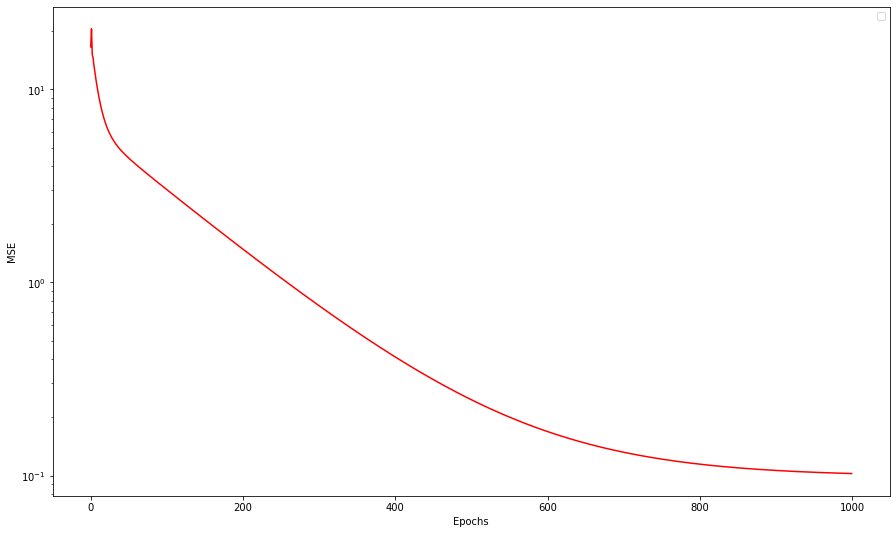

In [17]:
# Grafica MSE vs. epochs
fig1, axs1 = plt.subplots(1, sharey=True, figsize=(15, 9))
axs1.semilogy(np.arange(n_epochs), cost_loss, linewidth=1.5, color='r')
axs1.legend()
axs1.axes.set_xlabel('Epochs')
axs1.axes.set_ylabel('MSE')

Text(0, 0.5, 'y')

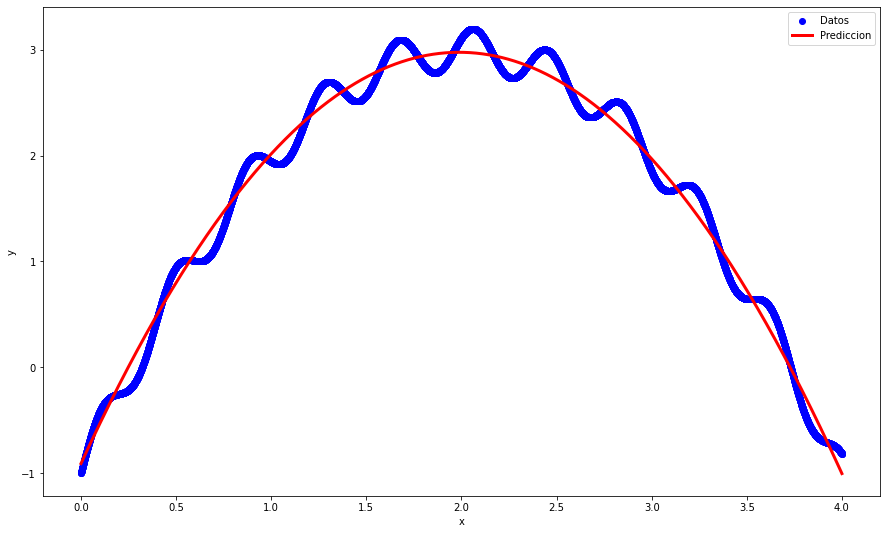

In [18]:
# Grafica datos vs. prediccion
y_pred = model.forward(dataset.x)
fig2, axs2 = plt.subplots(1, sharey=True, figsize=(15, 9))
axs2.scatter(x, dataset.y.detach().numpy(), color='b', label='Datos')
axs2.plot(x, y_pred.detach().numpy(), linewidth=3, color='r', label='Prediccion')
axs2.legend()
axs2.axes.set_xlabel('x')
axs2.axes.set_ylabel('y')